# Text generation with an RNN

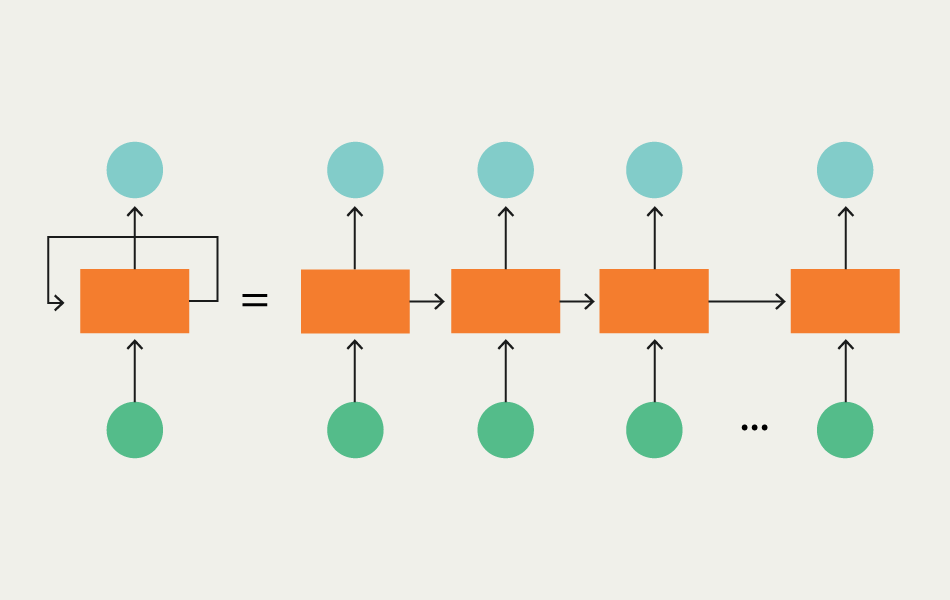

## Overview:
This code implements a Recurrent Neural Network (RNN) for text generation using TensorFlow. The model is trained on a Shakespearean text and is designed to generate text character by character. The code consists of several parts:

1. Data Preparation: The Shakespearean text is loaded, and a vocabulary of unique characters is created. The text is then split into sequences of a defined length.

2. Model Definition: An RNN-based model is defined using TensorFlow's tf.keras framework. It consists of an embedding layer, a GRU (Gated Recurrent Unit) layer, and a dense output layer.

3. Training: The model is trained using the prepared dataset of sequences. Training checkpoints are saved to resume training or generate text later.

4. Text Generation: After training, a sampling function is defined to generate text character by character using the trained model.

#### Imports the necessary libraries: TensorFlow, NumPy, and modules for file operations (os) and timing (time).

In [ ]:
import tensorflow as tf

import numpy as np
import os
import time

#### Downloads the Shakespearean text from the specified URL and saves it to the path_to_file location.

In [ ]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 1s 1us/step


1. Reads the content of the downloaded file as bytes ('rb' mode) and decodes it using UTF-8 encoding to obtain a text string.
2. Prints the length of the text in characters.
3. Prints the first 250 characters of the text.

In [ ]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


In [ ]:
# Take a look at the first 250 characters in text
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



#### Creates a sorted set of unique characters present in the text. Prints the number of unique characters in the vocabulary.

In [ ]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

65 unique characters


#### Defines a list of example texts. Uses TensorFlow's unicode_split function to split the example texts into individual characters, encoded using UTF-8.

In [ ]:
example_texts = ['abcdefg', 'xyz']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

#### Creates a StringLookup layer that maps characters to their corresponding integer IDs using the provided vocabulary. mask_token=None indicates that there's no masking token used.

In [ ]:
ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

#### Converts the character sequences to corresponding integer IDs using the ids_from_chars layer.

In [ ]:
ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[40, 41, 42, 43, 44, 45, 46], [63, 64, 65]]>

#### Creates another StringLookup layer for mapping integer IDs back to characters. Retrieves the vocabulary from the ids_from_chars layer using get_vocabulary(). invert=True ensures the mapping goes from IDs to characters.

In [ ]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

#### Converts the integer IDs back to character sequences using the chars_from_ids layer.

In [ ]:
chars = chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

#### Joins the character sequences back into strings using reduce_join. The resulting strings are converted to NumPy arrays.

In [ ]:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b'abcdefg', b'xyz'], dtype=object)

# Defines a function text_from_ids that converts integer ID sequences to text strings. Uses the ids_from_chars layer to convert the entire text into integer ID sequences.

In [ ]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [ ]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19, 48, 57, ..., 46,  9,  1])>

In [ ]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [ ]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

F
i
r
s
t
 
C
i
t
i


In [ ]:
seq_length = 100

In [ ]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)


In [ ]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [ ]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [ ]:
split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [ ]:
dataset = sequences.map(split_input_target)

In [ ]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: b'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [ ]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [ ]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [ ]:
model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 66) # (batch_size, sequence_length, vocab_size)


In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  16896     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  67650     
                                                                 
Total params: 4,022,850
Trainable params: 4,022,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

In [ ]:
sampled_indices

array([61, 41, 50, 40, 31, 49, 34, 11,  4, 13, 38, 11, 13, 55,  8, 57, 15,
       36, 63, 40, 53, 49, 32, 20, 20, 48,  3, 56,  8, 26, 16, 35, 25, 61,
        5, 49, 20, 18, 19,  8, 28, 41, 55, 28, 37, 16, 64, 31, 16, 65, 29,
       33, 25, 50, 32, 15, 41, 44, 15,  1, 26, 57, 48, 65, 48, 23, 45, 20,
       60, 29, 19,  2, 24, 29,  2, 36,  1, 48, 47, 43, 18, 50, 62, 61, 18,
       60, 26, 32, 26, 33, 56, 15, 45, 62, 53, 20, 30, 21,  6, 64])

In [ ]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b"lting o'er his prey,\nAnd so he comes, to rend his limbs asunder.\nAh, gentle Clifford, kill me with t"

Next Char Predictions:
 b"vbkaRjU:$?Y:?p-rBWxanjSGGi!q-MCVLv&jGEF-ObpOXCyRCzPTLkSBbeB\nMriziJfGuPF KP W\nihdEkwvEuMSMTqBfwnGQH'y"


In [ ]:
  loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)

Prediction shape:  (64, 100, 66)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.1907325, shape=(), dtype=float32)


In [ ]:
tf.exp(example_batch_mean_loss).numpy()

66.07117

In [ ]:
model.compile(optimizer='adam', loss=loss)

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [ ]:
EPOCHS = 20

In [ ]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
172/172 [==============================] - 903s 5s/step - loss: 2.7003
Epoch 2/20
172/172 [==============================] - 863s 5s/step - loss: 1.9814
Epoch 3/20
172/172 [==============================] - 856s 5s/step - loss: 1.7045
Epoch 4/20
172/172 [==============================] - 860s 5s/step - loss: 1.5448
Epoch 5/20
172/172 [==============================] - 857s 5s/step - loss: 1.4467
Epoch 6/20
172/172 [==============================] - 860s 5s/step - loss: 1.3788
Epoch 7/20
172/172 [==============================] - 885s 5s/step - loss: 1.3272
Epoch 8/20
172/172 [==============================] - 874s 5s/step - loss: 1.2822
Epoch 9/20
172/172 [==============================] - 855s 5s/step - loss: 1.2423
Epoch 10/20
172/172 [==============================] - 863s 5s/step - loss: 1.2017
Epoch 11/20
172/172 [==============================] - 852s 5s/step - loss: 1.1619
Epoch 12/20
172/172 [==============================] - 865s 5s/step - loss: 1.1201
Epoch 13/20
1

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [ ]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

ROMEO:
Sir, if you'ld Isabel.
Shall tell the present pamberful cook her, have
Simpled the fairous little advantage, good and loving friar,
To strike him down again to Plaise my house.
Yet that a wise barr life-strength wrong'd
These hard-head-eddeners.

BENVOLIO:
A horse, and many a town in good lies in land
And find his charger of thy pares.

LUCIO:
What men of worshipful senses you have done a brother?

JULIET:
Withdraw yourselves again, and love kept tumbling than an vouch'd rover,
Than fetch'd hath company my soul,
divine an expolity od such ready, and have vouch'd
And hang is virtue' to pluck it on any daughter
By whose infamities line own sorrow,
And see where he mighs action. Yes, were he must emiled Tybalt,
To soor him heark' to take as that account of Lancaster.
You may stand love confessor to my soul,
I do prolitious unless the daggeft player theme;
Af a young man, come down to me.
For one look 'gainst The halm, whereon I stroke
To bragging pride muscerery else, could never h

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result, '\n\n' + '_'*80)
print('\nRun time:', end - start)

tf.Tensor(
[b"ROMEO:\nEven in the Duke of Herefore dare not pass.\n\nRICHARD:\nIt is my sovereign, which I did have but\nYour suspicion, does in desperate haste.\n\nFRIAR LAUCURTIA:\nI am far benefut with him.\n\nClown:\nLet's teach the gates of a gramities.\n\nLADY ANNE:\nIt is a pieceould bed, whom I, she's hatry; go, an accursed word\ndowrary in a complete; peruse the glass.\n\nCLARENCE:\nMy brother Hold, eating Monectua lady?\n\nPETRUCHIO:\nLet me be it, proper to rise. Go, tred most shrub,\nTo let me set his mouth'd powers to it!\nI am a burthen widow, yet forward, carry is caught\nWith care, their lands and charts of cruel by the\nshepherd, boy, and let him commend ned, nor so my fair rather be.\n\nBAPTISTA:\nI know not: no more but my hands\nThe hopeful odies naily forced to call;\nFor but at this Roman care she looks about.\n\nJULIET:\nThen, Eaclmining, three-tilent, but in love\nUpon my fault, and that is loss, or doint,\nIf he could speak, marques here to supper them.\nThe wo

In [ ]:
tf.saved_model.save(one_step_model, 'one_step')
one_step_reloaded = tf.saved_model.load('one_step')

In [ ]:
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(100):
  next_char, states = one_step_reloaded.generate_one_step(next_char, states=states)
  result.append(next_char)

print(tf.strings.join(result)[0].numpy().decode("utf-8"))

ROMEO:
Thy father Bianca early name.

KING RICHARD III:
I think He tongue the enterprise upon her,
Daughte


In [ ]:
#Done